In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
# Download NVDA stock data
nvda = yf.Ticker("NVDA")
df = nvda.history(period="max")

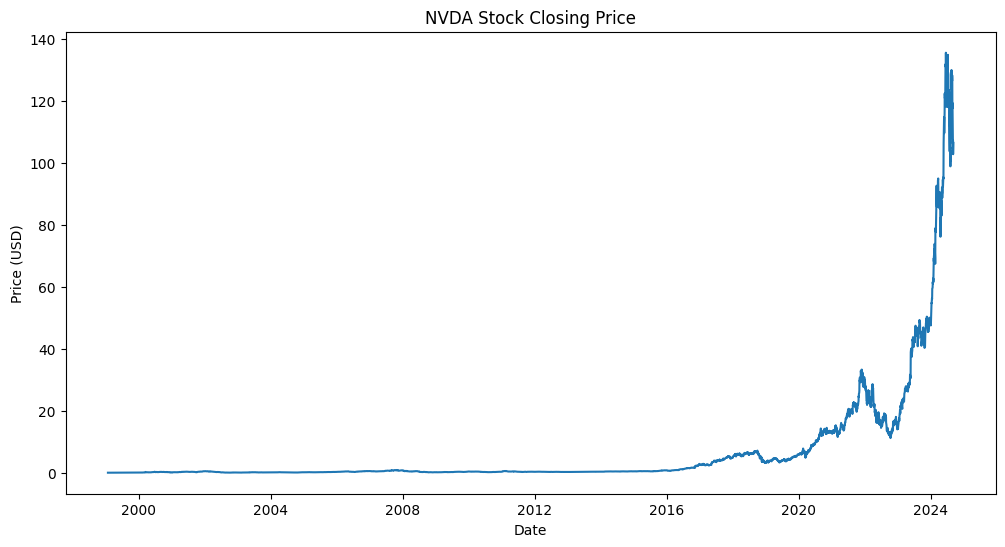

In [3]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'])
plt.title('NVDA Stock Closing Price')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.show()

In [4]:
# Calculate daily returns
df['Returns'] = df['Close'].pct_change()

# Create target variable (1 if tomorrow's price is higher, 0 otherwise)
df['Target'] = (df['Close'].shift(-1) > df['Close']).astype(int)

def calculate_rsi(data, periods=14):
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=periods).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=periods).mean()
    
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Create features
df['MA5'] = df['Close'].rolling(window=5).mean()
df['MA20'] = df['Close'].rolling(window=20).mean()
df['RSI'] = calculate_rsi(df['Close'], 14)
df['Volume_Change'] = df['Volume'].pct_change()

# Drop NaN values
df.dropna(inplace=True)

# Select features
features = ['Returns', 'MA5', 'MA20', 'RSI', 'Volume_Change']
X = df[features]
y = df['Target']


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [7]:
y_pred = rf_model.predict(X_test)

In [8]:
# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Print the accuracy score
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[283 307]
 [372 324]]

Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.48      0.45       590
           1       0.51      0.47      0.49       696

    accuracy                           0.47      1286
   macro avg       0.47      0.47      0.47      1286
weighted avg       0.48      0.47      0.47      1286


Accuracy Score:
0.47200622083981336


In [9]:
feature_importance = pd.DataFrame({'feature': features, 'importance': rf_model.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)
print("\nFeature Importances:")
print(feature_importance)



Feature Importances:
         feature  importance
0        Returns    0.208892
4  Volume_Change    0.206994
3            RSI    0.204804
1            MA5    0.190329
2           MA20    0.188981


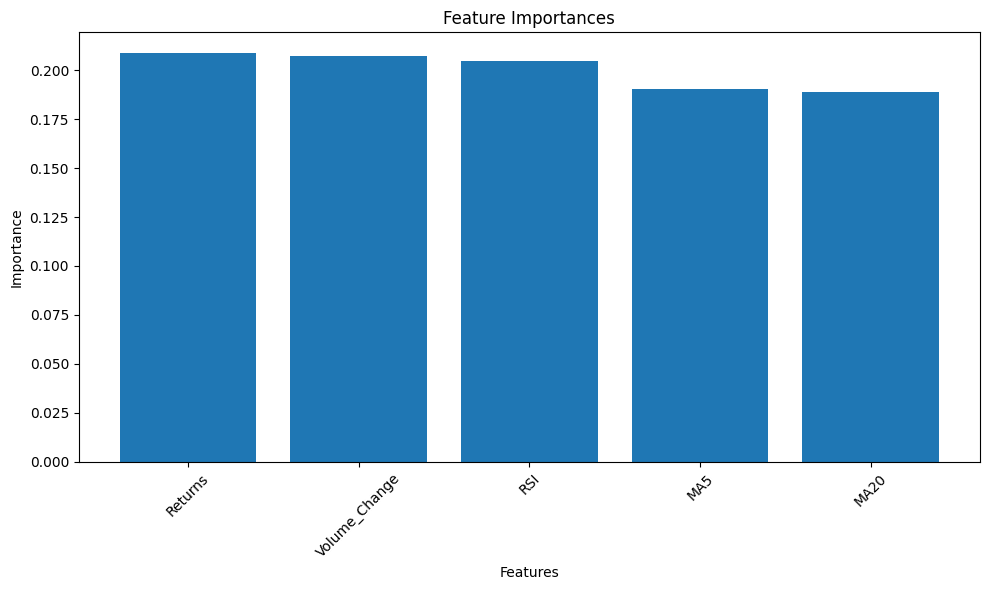

In [10]:
plt.figure(figsize=(10, 6))
plt.bar(feature_importance['feature'], feature_importance['importance'])
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [11]:
last_data = X.iloc[-1].to_frame().T  # Convert to DataFrame with feature names
next_day_prediction = rf_model.predict(last_data)
print("\nPrediction for the next day:")
print("Up" if next_day_prediction[0] == 1 else "Down")



Prediction for the next day:
Down


In [12]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nPrediction Scores:")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")


Prediction Scores:
Precision: 0.5135
Recall: 0.4655
F1-score: 0.4883
